# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 1 - Part 3:

In this part, we will apply some of NLP techniques on a dataset containing Wikipedia texts ($\texttt{WikipediaEvents.csv}$ file). The primary goal of this part is to demonstrate how various NLP techniques can be effectively utilized in data science to process and analyze textual data.

## Project Objectives

1. **Text Preprocessing:** Cleaning the text in the dataset for analysis, which includes converting text to lower case, removing punctuation, and eliminating numerical expressions.

2. **Stopwords Removal:** Enhancing feature extraction by omitting commonly occurring words that add little value to the text's meaning.

3. **Word Frequency Analysis:** Identifying the most prevalent terms by calculating word frequencies within the text.

4. **Data Visualization:** Using graphical tools like barplot graphs and WordCloud for a more illustrative presentation of the data.

### Install important libraries

In [ ]:
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud

### Import libraries

In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from minisom import MiniSom

### Adjusting row column settings

In [ ]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading dataset

In [ ]:
df = pd.read_csv("WikipediaEvents.csv", index_col=0)
print("shape of dataset: {}" .format(df.shape))
df.head()

## Text preprocessing

In [ ]:
df["text"]

### 1. Lowercases, Punctuation, Numbers and Newline Characters

In [ ]:
def clean_text(text):
    """
    Clean and preprocess text data.

    This function performs several cleaning operations on text data:
    - Lowercases the text (Case Folding)
    - Removes punctuation
    - Removes numbers
    - Removes newline characters

    Parameters:
    text (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.Series: A pandas Series with cleaned text.
    """
    # Lowercasing (Case Folding)
    text = text.str.lower()
    # Removing punctuations, numbers, and newline characters
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=True)
    text = text.str.replace('\d', '', regex=True)
    return text

In [ ]:
df["text"] = clean_text(df["text"])
df["text"]

### 2. Stopwords Removal

In [ ]:
nltk.download("stopwords")
stop_words = stopwords.words("english")

In [ ]:
def remove_stopwords(text):
    """
    Remove stopwords from text data.

    This function filters out common stopwords from the text data. 
    Stopwords are removed based on the NLTK's English stopwords list.

    Parameters:
    text (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.Series: A pandas Series with stopwords removed from the text.
    """
    text = text.apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))
    return text

In [ ]:
df["text"] = remove_stopwords(df["text"])
df["text"]

### 3. Rare Words and Frequent Words

In [ ]:
def remove_rare_words(df, column_name, n_rare_words=1000):
    """
    Remove rare words from a specified column in a pandas DataFrame.

    This function identifies and removes the least frequently occurring words
    in the text data. It is useful for removing rare words that might not contribute
    significantly to the analysis or modeling.

    Parameters:
    df (pandas.DataFrame): A pandas DataFrame containing the text data.
    column_name (str): The name of the column in the DataFrame to clean.
    n_rare_words (int): The number of least frequent words to remove.

    Returns:
    pandas.DataFrame: A DataFrame with rare words removed from the specified column.
    """
    # Identifying the rare words
    freq = pd.Series(' '.join(df[column_name]).split()).value_counts()
    rare_words = freq[-n_rare_words:]

    # Removing the rare words
    df[column_name] = df[column_name].apply(lambda x: " ".join(word for word in x.split() if word not in rare_words))
    return df

In [ ]:
df = remove_rare_words(df, 'text', 1000)
df["text"]

### 4. Tokenization

In [ ]:
nltk.download('punkt')
df["text"].apply(lambda x: TextBlob(x).words)

### 5. Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
def apply_lemmatization(df, column_name):
    """
    Apply lemmatization to a specified column in a pandas DataFrame.

    This function performs lemmatization on the text data in the specified column.
    Lemmatization involves reducing each word to its base or root form.

    Parameters:
    df (pandas.DataFrame): A pandas DataFrame containing the text data.
    column_name (str): The name of the column in the DataFrame to process.

    Returns:
    pandas.DataFrame: A DataFrame with lemmatized text in the specified column.
    """
    # Applying lemmatization
    df[column_name] = df[column_name].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

    return df

In [ ]:
df = apply_lemmatization(df, 'text')
df['text']

### 6. Calculation of Term Frequencies & Barplot & Word Cloud

In [ ]:
def plot_tf_and_wordcloud(df, column_name, tf_threshold=2000, max_font_size=50, max_words=100, background_color="black"):
    """
    Calculate term frequency (TF) and generate a word cloud for a specified column in a pandas DataFrame.

    This function performs two main tasks:
    1. Term Frequency Calculation and Bar Chart: Calculates the frequency of each word in the specified column and plots a bar chart for words with a frequency above a certain threshold.
    2. Word Cloud Generation: Generates and displays a word cloud based on the text in the specified column.

    Parameters:
    df (pandas.DataFrame): A pandas DataFrame containing the text data.
    column_name (str): The name of the column to analyze.
    tf_threshold (int): The threshold for term frequency to be included in the bar chart.
    max_font_size (int): Maximum font size for the word cloud.
    max_words (int): The maximum number of words for the word cloud.
    background_color (str): Background color for the word cloud.

    Returns:
    None: This function only plots the results and does not return any value.
    """
    # 1. Term Frequency Calculation and Bar Chart
    tf = df[column_name].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    tf.columns = ["words", "tf"]
    high_tf = tf[tf["tf"] > tf_threshold]
    high_tf.plot.bar(x="words", y="tf", title="Term Frequency Bar Chart")
    plt.show()

    # 2. Word Cloud Generation
    text = " ".join(i for i in df[column_name])
    wordcloud = WordCloud(max_font_size=max_font_size, max_words=max_words, background_color=background_color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Word Cloud")
    plt.axis("off")
    plt.show()

In [ ]:
plot_tf_and_wordcloud(df, "text", tf_threshold=30)

In [ ]:
df['text']
# save pretrained dataset
df.to_csv('preprocessed_data.csv', index=False)

### 7. Word to vector embeddings using GloVe pretrained model

In [ ]:
# load glove pretrained model
glove_input_file = "../../../Dataset/glove.6B.100d.txt"
word2vec_output_file = "../../../Dataset/glove.word2vec.txt"
glove2word2vec(glove_input_file, word2vec_output_file)

glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
def convert_to_vector(text):
    """
    Convert words to vectors using a pre-trained GloVe model.

    This function converts each word in the text to its corresponding vector representation
    using a pre-trained GloVe model. If a word is not in the model's vocabulary, it is ignored.

    Parameters:
    text (str): The text to convert.

    Returns:
    list: A list of vectors representing the words in the text.
    """
    return [glove_model[word] for word in text.split() if word in glove_model]

In [ ]:
df["vectors"] = df['text'].apply(convert_to_vector)
df.to_csv("word2vec_out.csv", index=False)
df["vectors"]

In [ ]:
data = df.values
print(data.shape)
# data

### Visualize vector representation

In [ ]:
# extract the word vectors and their corresponding words
words = []
vectors = []
for _, row in df.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        words.append(word)
        vectors.append(vector)

# use t-SNE to reduce the dimension of the vectors to 2D
vectors = np.array(vectors)
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# vrctors_2d = vectors.reshape(-1, 2)

plt.figure(figsize=(10, 10))
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(vectors_2d)))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], edgecolors='k', c=colors, alpha=0.6, s=50)

for word, (x, y) in zip(words, vectors_2d):
    plt.text(x, y, word, fontsize=8)

plt.title("t-SNE visualization of word vectors", fontsize=20)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)

plt.show()

In [ ]:
print(vectors.shape)
# print(vectors)

print(vectors_2d.shape)
# print(vectors_2d)

vectors = vectors.reshape(-1, 2)
print(vectors.shape)
# print(vectors)


### plot random sets

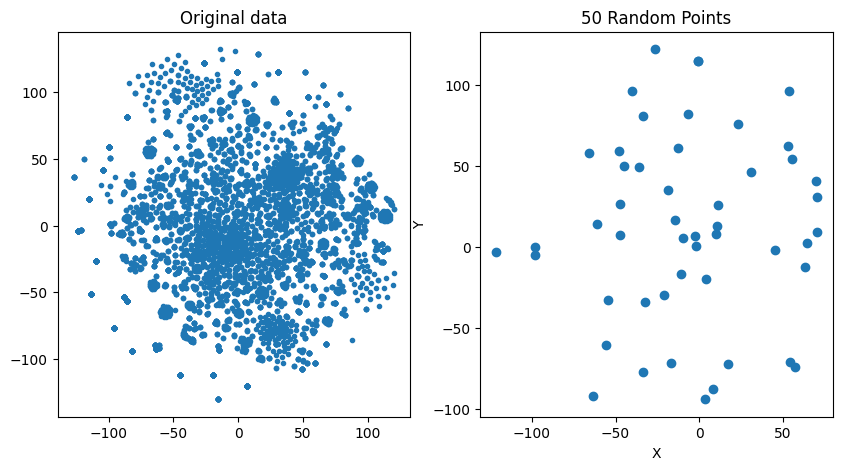

In [84]:
random_sample_size = 50

random_indices = np.random.choice(vectors_2d.shape[0], size=random_sample_size, replace=False)
random_points = vectors_2d[random_indices]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.')
plt.title("Original data")

plt.subplot(1, 2, 2)
plt.scatter(random_points[:, 0], random_points[:, 1])
plt.title("{} Random Points" .format(random_sample_size))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Define and Train SOM network

In [85]:
"""
def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5,
                 decay_function=asymptotic_decay,
                 neighborhood_function='gaussian', topology='rectangular',
                 activation_distance='euclidean', random_seed=None):

Parameters
        ----------
        x : int
            x dimension of the SOM.

        y : int
            y dimension of the SOM.

        input_len : int
            Number of the elements of the vectors in input.

"""


# Initialization and training
som_shape = (1, 5)
som = MiniSom(som_shape[0], som_shape[1], vectors_2d.shape[1], sigma=.5, learning_rate=.5,
            neighborhood_function='gaussian', random_seed=10)

som.train_batch(vectors_2d, 50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 37.94900830809914


### Plot clusters on all data

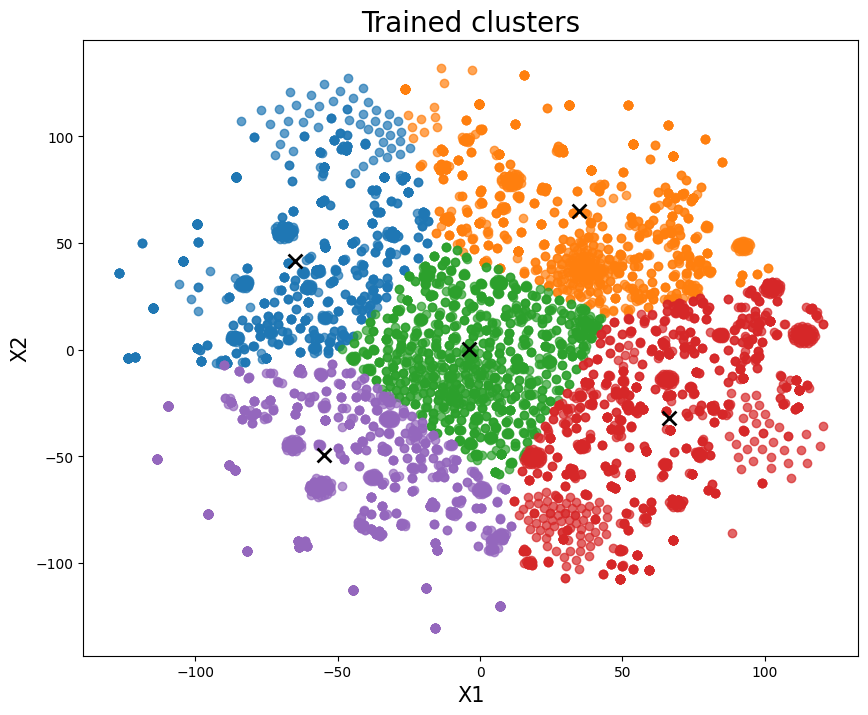

In [86]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in vectors_2d]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


plt.figure(figsize=(10, 8))
for c in np.unique(cluster_index):
    plt.scatter(vectors_2d[cluster_index == c, 0],
                vectors_2d[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
    plt.title("Trained clusters", fontsize=20)
    plt.xlabel("X1", fontsize=15)
    plt.ylabel("X2", fontsize=15)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=100, linewidths=2, color='k', label='centroid')

### Plot clusters on 50 random data

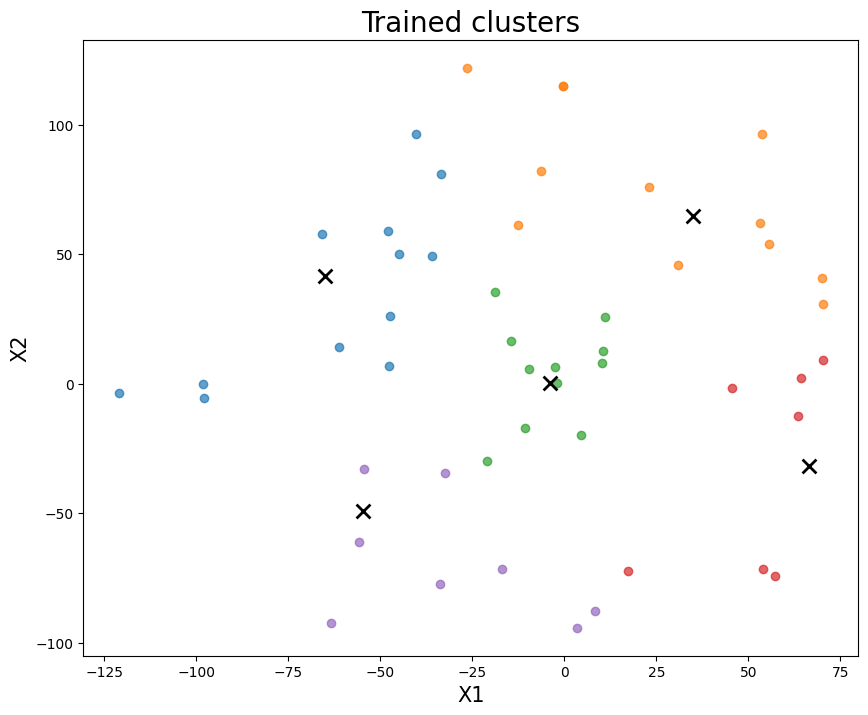

In [87]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in random_points]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


plt.figure(figsize=(10, 8))
for c in np.unique(cluster_index):
    plt.scatter(random_points[cluster_index == c, 0],
                random_points[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
    plt.title("Trained clusters", fontsize=20)
    plt.xlabel("X1", fontsize=15)
    plt.ylabel("X2", fontsize=15)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=100, linewidths=2, color='k', label='centroid')